<a href="https://colab.research.google.com/github/SheikhMudassarHanif/MachineLearning/blob/main/LinearRegrssionWithSklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression , To Predict the annual medical expenditure for new customer using the  information such as their SEX,AGE,BMI,CHILDREN,SMOKING HABBITS,REGION of Residence.

In [1]:
medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'

In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve(medical_charges_url,'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x7bda6e6d13f0>)

In [4]:
import pandas as pd

In [5]:
medical_df=pd.read_csv('medical.csv')

In [6]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [7]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
import matplotlib.pyplot as plt


In [10]:
import seaborn as sns
import plotly

In [11]:
%matplotlib inline

In [12]:
import plotly.express as px

In [13]:
sns.set_style('darkgrid')
plt.rcParams['font.size']=14
plt.rcParams['figure.figsize']=(10,6)
plt.rcParams['figure.facecolor']='#00000000'

In [14]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [15]:
fig=px.histogram(medical_df,x='age',marginal='box',nbins=47, title='Distribution Of Age')
fig.update_layout(bargap=0.1)
fig.show()

BMI

In [16]:
fig=px.histogram(medical_df,x='bmi',color_discrete_sequence=['red'],marginal='box',title='Distribution of BMI',nbins=47)
fig.update_layout(bargap=0.2)
fig.show()

In [17]:
fig=px.histogram(medical_df,x='charges',color='smoker',color_discrete_sequence=['green','grey'],marginal='box',title='Distribution of Charges',nbins=47)
fig.update_layout(bargap=0.2)
fig.show()

In [18]:
fig=px.histogram(medical_df,x='charges',color='sex',color_discrete_sequence=['blue','grey'],marginal='box',title='Distribution of Charges with sex',nbins=47)
fig.update_layout(bargap=0.2)
fig.show()

In [19]:
fig=px.histogram(medical_df,x='charges',color='region',color_discrete_sequence=['blue','red','purple','yellow'],marginal='box',title='Distribution of Charges across different regions',nbins=47)
fig.update_layout(bargap=0.2)
fig.show()

In [20]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [21]:
px.histogram(medical_df,x='smoker',color='sex',title='Smoker')

In [22]:
px.histogram(medical_df,x='smoker',color='region',title='smoker?region')

Relationship with age and charges

In [23]:
fig=px.scatter(medical_df,x='age',y='charges',color='smoker',opacity=0.8,
               hover_data=['sex'],title='Age vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [24]:
fig=px.scatter(medical_df,x='bmi',y='charges',color='smoker',opacity=0.8,
               hover_data=['sex'],title='BMI vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [25]:
fig=px.scatter(medical_df,x='region',y='charges',color='smoker',opacity=0.8,
               hover_data=['sex'],title='region vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [26]:
fig=px.scatter(medical_df,x='sex',y='charges',color='smoker',opacity=0.8,
               hover_data=['sex'],title='region vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [27]:
fig=px.violin(medical_df,x='children',y='charges',color='smoker',
               hover_data=['sex'],title='children vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [28]:
fig=px.scatter(medical_df,x='smoker',y='charges',color='sex',opacity=0.8,
               hover_data=['sex'],title='smoker vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [29]:
fig=px.violin(medical_df,x='smoker',y='charges',color='sex',
               hover_data=['sex'],title='smoker vs Charges')
fig.update_traces(marker_size=5)
fig.show()

now checking co relationship

In [30]:
medical_df.charges.corr(medical_df.age)

0.2990081933306476

In [31]:
medical_df.charges.corr(medical_df.bmi)

0.19834096883362895

In [32]:
medical_df.charges.corr(medical_df.children)
smoker_values={'no':0,'yes':1}

In [33]:
smoker_numeric=medical_df.smoker.map(smoker_values)
smoker_numeric

,smoker
0,1
1,0
2,0
3,0
4,0
...,...
1333,0
1334,0
1335,0
1336,0


In [34]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [35]:
medical_mdf = medical_df[['age', 'children', 'bmi', 'charges']]


In [36]:
medical_mdf.corr()

,age,children,bmi,charges
age,1.000000,0.042469,0.109272,0.299008
children,0.042469,1.000000,0.012759,0.067998
bmi,0.109272,0.012759,1.000000,0.198341
charges,0.299008,0.067998,0.198341,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

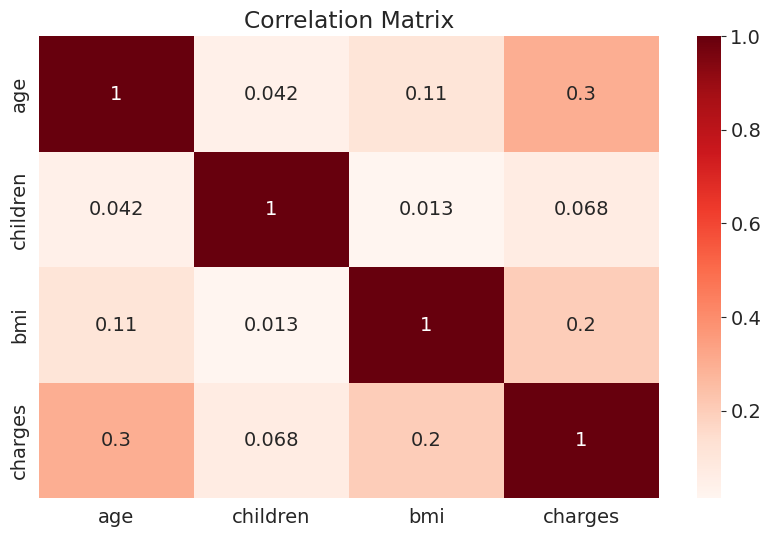

In [37]:
sns.heatmap(medical_mdf.corr(),cmap='Reds',annot=True)
plt.title('Correlation Matrix')

In [38]:
medical_df.charges.corr(smoker_numeric)

0.787251430498478

In [39]:
non_smoker_df=medical_df[medical_df.smoker=='no']

<Axes: title={'center': 'AGE vs Charges'}, xlabel='age', ylabel='charges'>

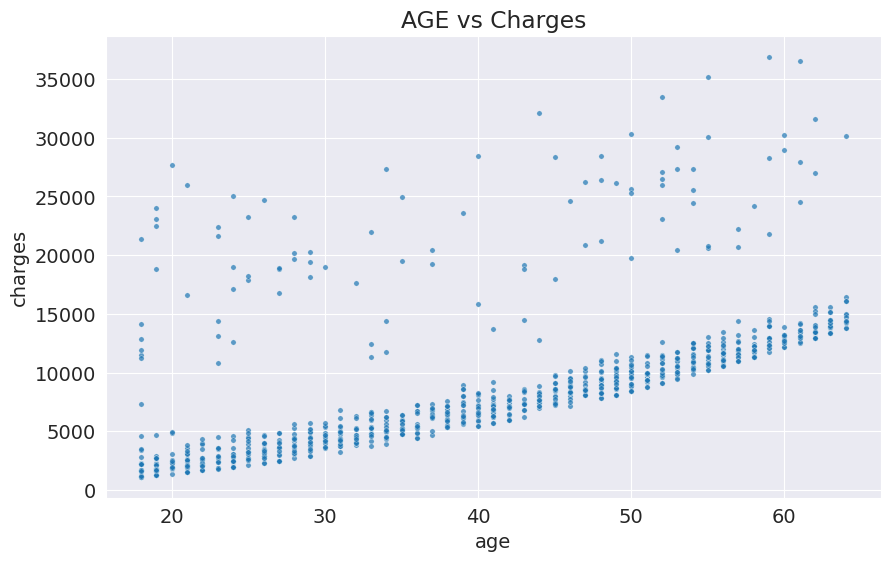

In [40]:
plt.title('AGE vs Charges')
sns.scatterplot(data=non_smoker_df,x='age',y='charges',alpha=0.7,s=15)

<Axes: title={'center': 'AGE vs Charges'}, xlabel='age', ylabel='charges'>

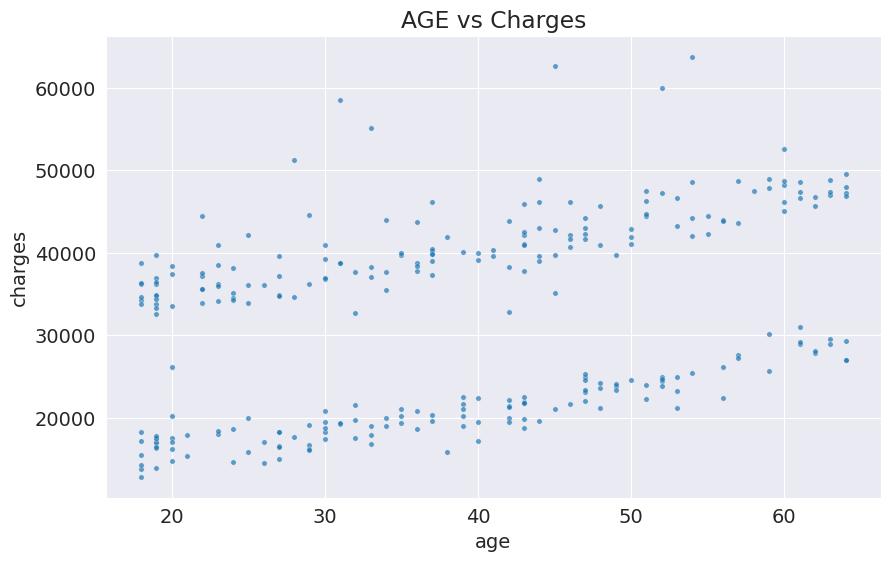

In [41]:
smoker_df=medical_df[medical_df.smoker=='yes']
plt.title('AGE vs Charges')
sns.scatterplot(data=smoker_df,x='age',y='charges',alpha=0.7,s=15)

In [42]:
def estimate_charges(age,w,b):
  return w*age+b

In [43]:
w=50
b=100
# esitmate_charges()

In [44]:
ages=non_smoker_df.age

In [45]:
estimate_charges=estimate_charges(ages,w,b)

Text(0, 0.5, 'Estimated Charges')

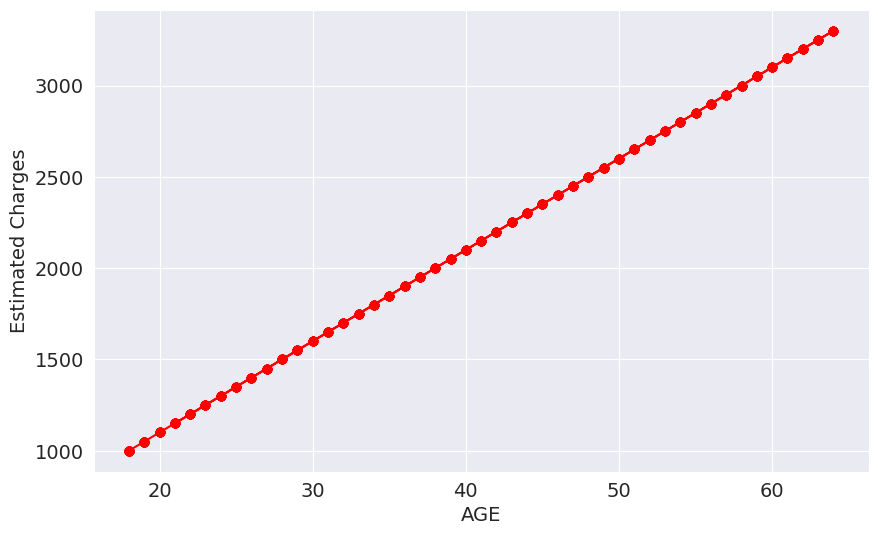

In [46]:
plt.plot(ages,estimate_charges,'r-o')
plt.xlabel('AGE')
plt.ylabel('Estimated Charges')

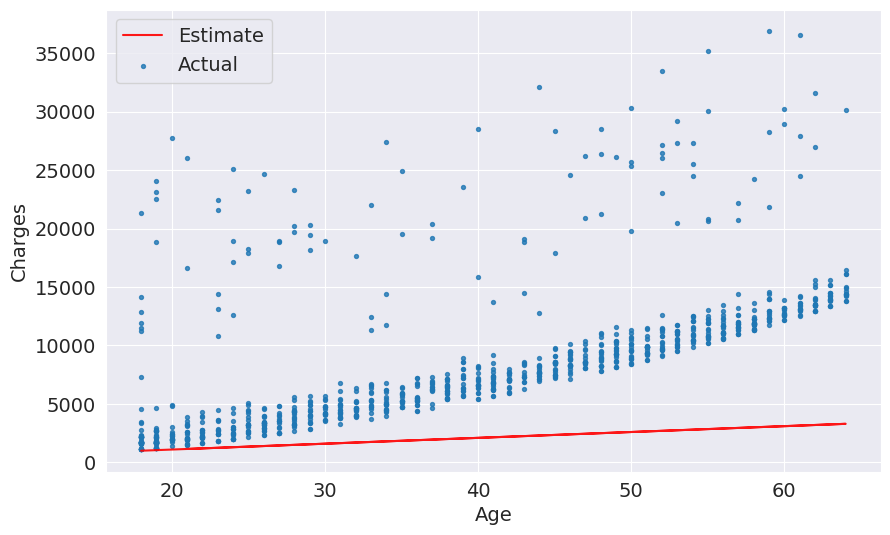

In [47]:
target=non_smoker_df.charges
plt.plot(ages,estimate_charges,'r',alpha=0.9)
plt.scatter(ages,target,s=8,alpha=0.8)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend(['Estimate','Actual'])

In [48]:
 #ML Starts

In [49]:
target
#actual Y charges value

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [50]:
pridections=estimate_charges
pridections

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [51]:
import numpy as np

In [52]:
def rmse(targets,predictions):
  return np.sqrt(np.mean(np.square(targets-predictions)))

In [53]:
def estimate_charges(age,w,b):
  return w*age+b

In [54]:
predictions=estimate_charges(non_smoker_df.age,50,100)

In [55]:
rmse(target,predictions)

8461.949562575493

In [56]:
def Try_parameters(w,b):
  ages=non_smoker_df.age
  target=non_smoker_df.charges
  prediction=estimate_charges(ages,w,b)

  plt.plot(ages,prediction,'r',alpha=0.9)
  plt.scatter(ages,target,s=8,alpha=0.8)
  plt.xlabel('Age')
  plt.ylabel('Charges')
  plt.legend(['Predictions','Actual'])
  loss=rmse(target,prediction)
  print('RMSE LOSS : ',loss)

RMSE LOSS :  4662.505766636395


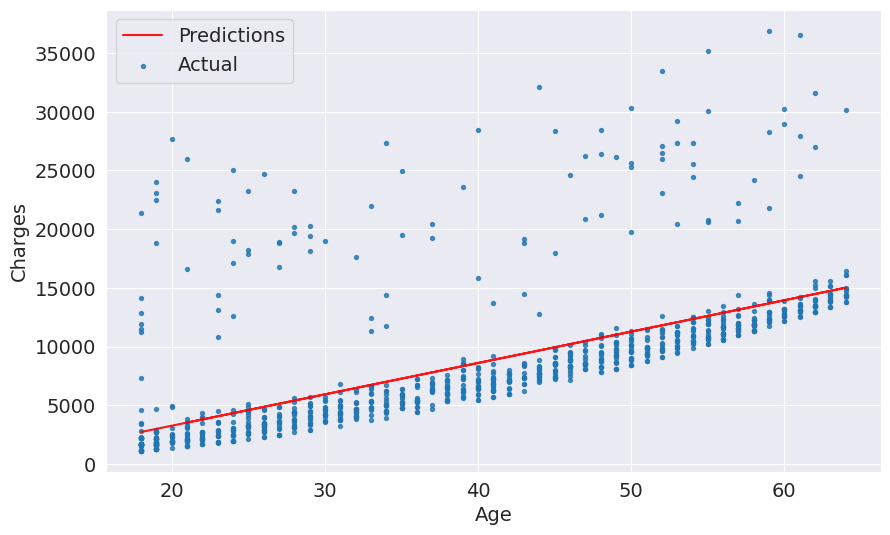

In [57]:
Try_parameters(267.24891283,-2091.4205565650864)
#the values are predicted by the model itself

In [58]:
#here we are figuring out the values of b and w ourselves but how much we leave it to the machine and let i learnn itself for that we use graident descent

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model=LinearRegression()

In [61]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.
    
    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.
    
    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.
    
        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.
    
    Returns
    -------
    self : object
        Fitted Estimator.



In [62]:
inputs=non_smoker_df[['age']]
targets=non_smoker_df.charges
#inputs must be an dataframe or 2 dimension where as targets can be array

In [63]:
model.fit(inputs,targets)

LinearRegression()

In [64]:
model.predict(np.array([[23],[37],[61]]))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [65]:
inputs.shape

(1064, 1)

In [66]:
targets.shape

(1064,)

In [67]:
predictions=model.predict(inputs)

In [68]:
rmse(targets,predictions)

4662.505766636395

In [69]:
model.coef_

array([267.24891283])

In [70]:
model.intercept_

-2091.4205565650864

In [72]:
#summarized
inputs,targets=non_smoker_df[['age']],non_smoker_df.charges
model=LinearRegression()
model.fit(inputs,targets)
predictions=model.predict(inputs)
print(rmse(targets,predictions))
print('w = ',model.coef_[0])
print('b = ',model.intercept_)


4662.505766636395
w =  267.2489128311997
b =  -2091.4205565650864
